In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh

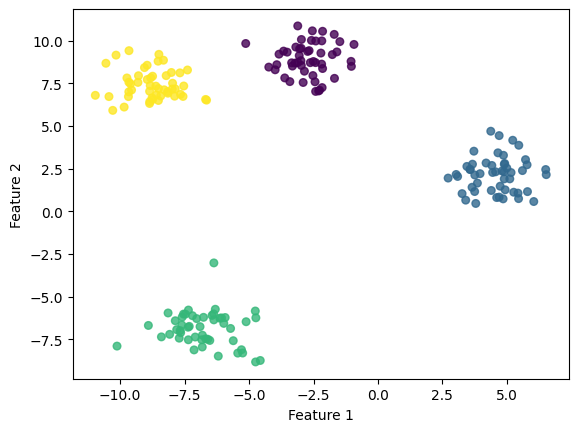

In [44]:
# data generation
X, Y = datasets.make_blobs(n_samples=200, centers=4, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

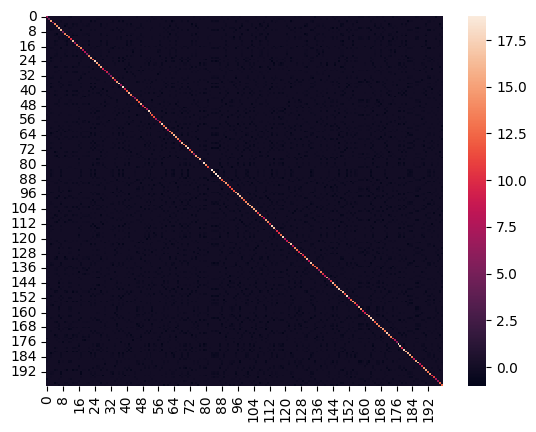

In [45]:
# A -> D -> L
A = np.exp(-pairwise_distances(X, metric='euclidean'))
D = np.diag(np.sum(A, axis=1))
L = D - A

# visualization of L
sns.heatmap(L)
plt.show()

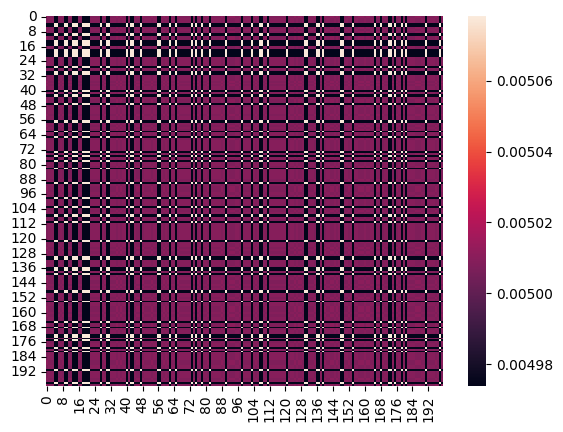

In [46]:
# the inverse of L and its normalization
L_inv = np.linalg.inv(L + np.eye(L.shape[0]) * 1e-6)

# algernatively, use its Moore-Penrose pseudo inverse
# L_inv = np.linalg.pinv(L + np.eye(L.shape[0]) * 1e-6)

norm = np.linalg.norm(L_inv)
L_inv_norm = L_inv / norm

# visualization of the inverse of L
sns.heatmap(L_inv_norm)
plt.show()

In [47]:
pd.DataFrame(L_inv_norm)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.005010,0.005008,0.005008,0.005008,0.004974,0.004974,0.005010,0.005008,0.005010,0.004974,...,0.005008,0.004974,0.005008,0.005008,0.005008,0.005008,0.005010,0.005008,0.004974,0.005010
1,0.005008,0.005009,0.005009,0.005009,0.004974,0.004974,0.005008,0.005009,0.005008,0.004974,...,0.005009,0.004974,0.005009,0.005009,0.005009,0.005009,0.005008,0.005009,0.004974,0.005008
2,0.005008,0.005009,0.005009,0.005009,0.004974,0.004974,0.005008,0.005009,0.005008,0.004974,...,0.005009,0.004974,0.005009,0.005009,0.005009,0.005009,0.005008,0.005009,0.004974,0.005008
3,0.005008,0.005009,0.005009,0.005009,0.004974,0.004974,0.005008,0.005009,0.005008,0.004974,...,0.005009,0.004974,0.005009,0.005009,0.005009,0.005009,0.005008,0.005009,0.004974,0.005008
4,0.004974,0.004974,0.004974,0.004974,0.005078,0.005078,0.004974,0.004974,0.004974,0.005078,...,0.004974,0.005078,0.004974,0.004974,0.004974,0.004974,0.004974,0.004974,0.005078,0.004974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.005008,0.005009,0.005009,0.005009,0.004974,0.004974,0.005008,0.005009,0.005008,0.004974,...,0.005009,0.004974,0.005009,0.005009,0.005009,0.005009,0.005008,0.005009,0.004974,0.005008
196,0.005010,0.005008,0.005008,0.005008,0.004974,0.004974,0.005010,0.005008,0.005010,0.004974,...,0.005008,0.004974,0.005008,0.005008,0.005008,0.005008,0.005010,0.005008,0.004974,0.005010
197,0.005008,0.005009,0.005009,0.005009,0.004974,0.004974,0.005008,0.005009,0.005008,0.004974,...,0.005009,0.004974,0.005009,0.005009,0.005009,0.005009,0.005008,0.005009,0.004974,0.005008
198,0.004974,0.004974,0.004974,0.004974,0.005078,0.005078,0.004974,0.004974,0.004974,0.005078,...,0.004974,0.005078,0.004974,0.004974,0.004974,0.004974,0.004974,0.004974,0.005078,0.004974


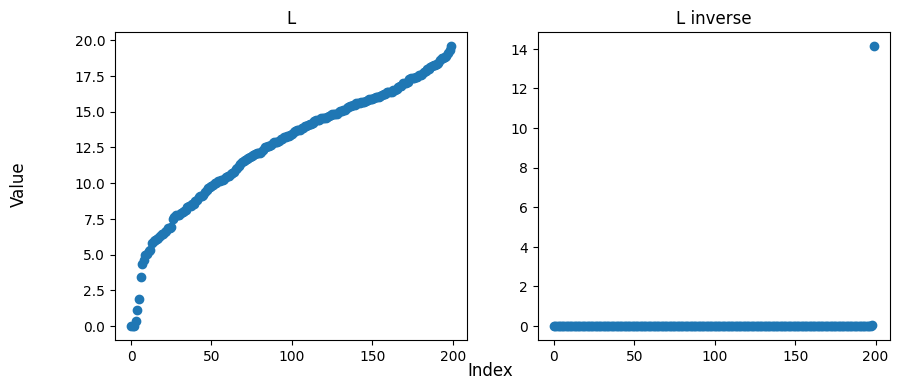

In [48]:
# spectra of L and its inverse
val, vec = eigh(L)
inv_val, inv_vec = eigh(normalize(L_inv))

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].scatter(range(len(val)), val)
axs[0].set_title('L')
axs[1].scatter(range(len(val)), inv_val)
axs[1].set_title('L inverse')
fig.supxlabel('Index')
fig.supylabel('Value')
plt.show()

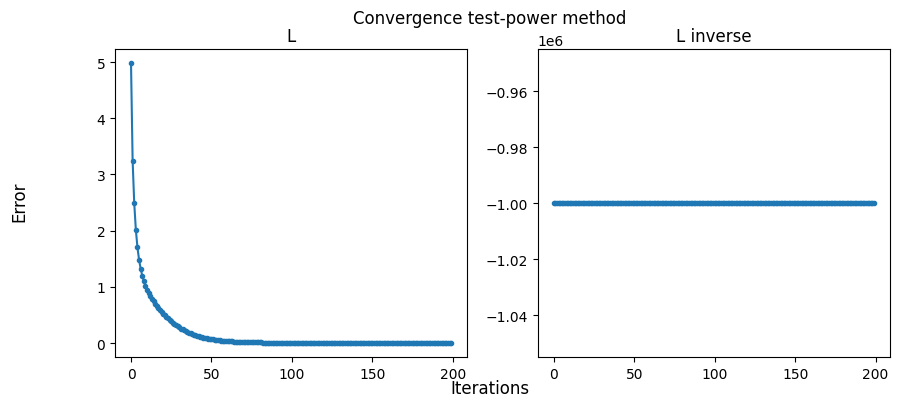

In [49]:
# power method applied to L and its inverse
def power_method(A, num_iter=200, tol=1e-6):
    n = A.shape[0]
    x_k = np.ones(n)

    for _ in range(num_iter):
        x_k = np.dot(A, x_k)
        x_k_norm = np.linalg.norm(x_k)
        x_k_next = x_k / x_k_norm

        # stopping criterion
        if np.linalg.norm(x_k_next - x_k) < tol:
            break
        x_k = x_k_next

    # Rayleigh quotient (only to perform the following convergence test)
    eig_val = np.dot(x_k.T, np.dot(A, x_k)) / np.dot(x_k.T, x_k)
    return eig_val, x_k

# convergence test 
iter_diff = []
inv_iter_diff = []
for i in range(1,201):
    p_val, p_vec = power_method(L, num_iter=i)
    iter_diff.append(val[-1]-p_val)
    p_inv_val, p_inv_vec = power_method(L_inv, num_iter=i)
    inv_iter_diff.append(val[-1]-p_inv_val)

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].plot(range(200), iter_diff,'.-')
axs[0].set_title('L')
axs[1].plot(range(200), inv_iter_diff,'.-')
axs[1].set_title('L inverse')
fig.supxlabel('Iterations')
fig.supylabel('Error')
fig.suptitle('Convergence test-power method')
plt.show()

In [50]:
# find their least dominant eigenvectors further
def deflate(A, eig_val, eig_vec):
    return A - eig_val * np.outer(eig_vec, eig_vec)

def_val = []
def_vec = []
def_mat = L_inv

num_eig_pair = 4 # bear in mind that the first pair lacks the ability to group data

for i in range(num_eig_pair):  
    eig_val, eig_vec = power_method(def_mat)
    def_val.append(eig_val)
    def_vec.append(eig_vec)
    def_mat = deflate(def_mat, eig_val, eig_vec)

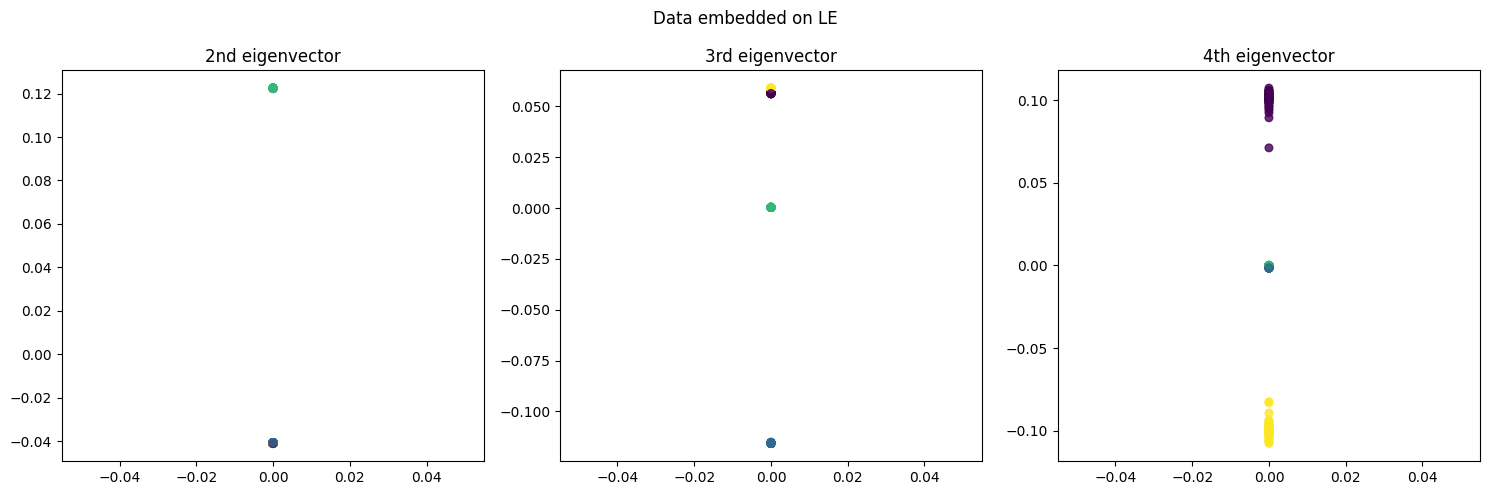

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(np.zeros(len(def_vec[1])), def_vec[1], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('2nd eigenvector')

axs[1].scatter(np.zeros(len(def_vec[2])), def_vec[2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('3rd eigenvector')

axs[2].scatter(np.zeros(len(def_vec[3])), def_vec[3], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('4th eigenvector')

fig.suptitle('Data embedded on LE')
plt.tight_layout()
plt.show()

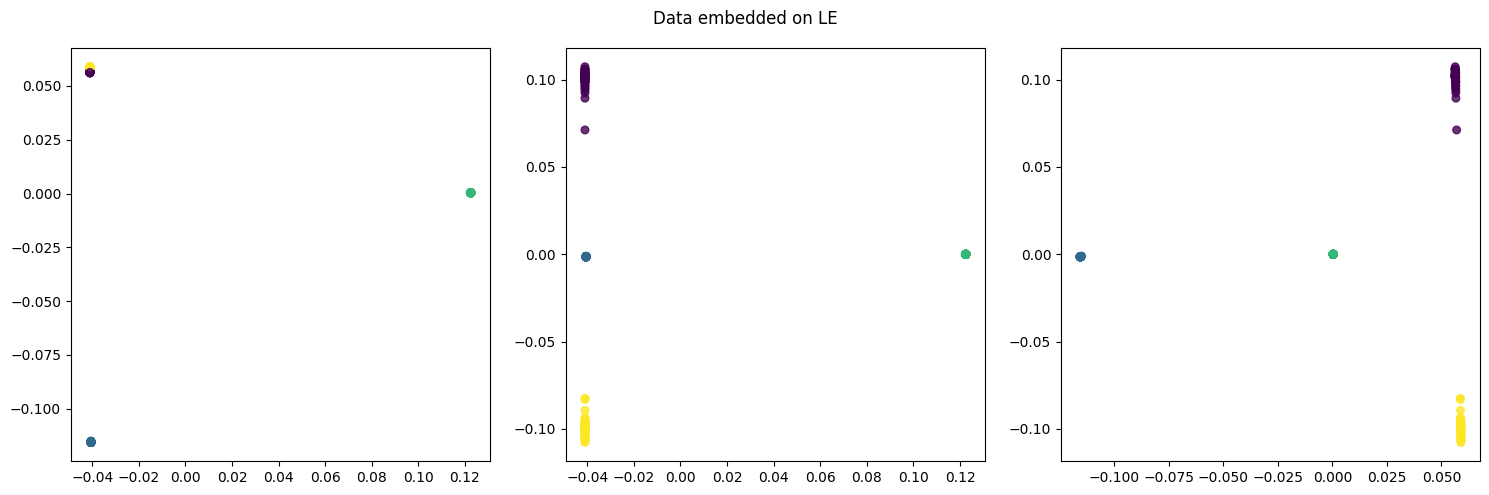

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(def_vec[1], def_vec[2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].scatter(def_vec[1], def_vec[3], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].scatter(def_vec[2], def_vec[3], c=Y, cmap='viridis', s=30, alpha=0.8)

fig.suptitle('Data embedded on LE')
plt.tight_layout()
plt.show()